#Prodigy Task 3


Step 1: Setup and Load

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

file_path = 'bank1.csv'
df = pd.read_csv(file_path, sep=';')
print("Dataset loaded successfully.")

print("\nColumns immediately after loading:")
print(df.columns)

y = df['y'].map({'yes': 1, 'no': 0})
feature_cols = [col for col in df.columns if col != 'y']
X = df[feature_cols]

categorical_cols = X.select_dtypes(include=['object']).columns
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\nData has been preprocessed successfully.")

Dataset loaded successfully.

Columns immediately after loading:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Data has been preprocessed successfully.


Step 2: Train and Test

Model training complete.

Model Accuracy: 0.8974

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:
[[7753  199]
 [ 729  362]]


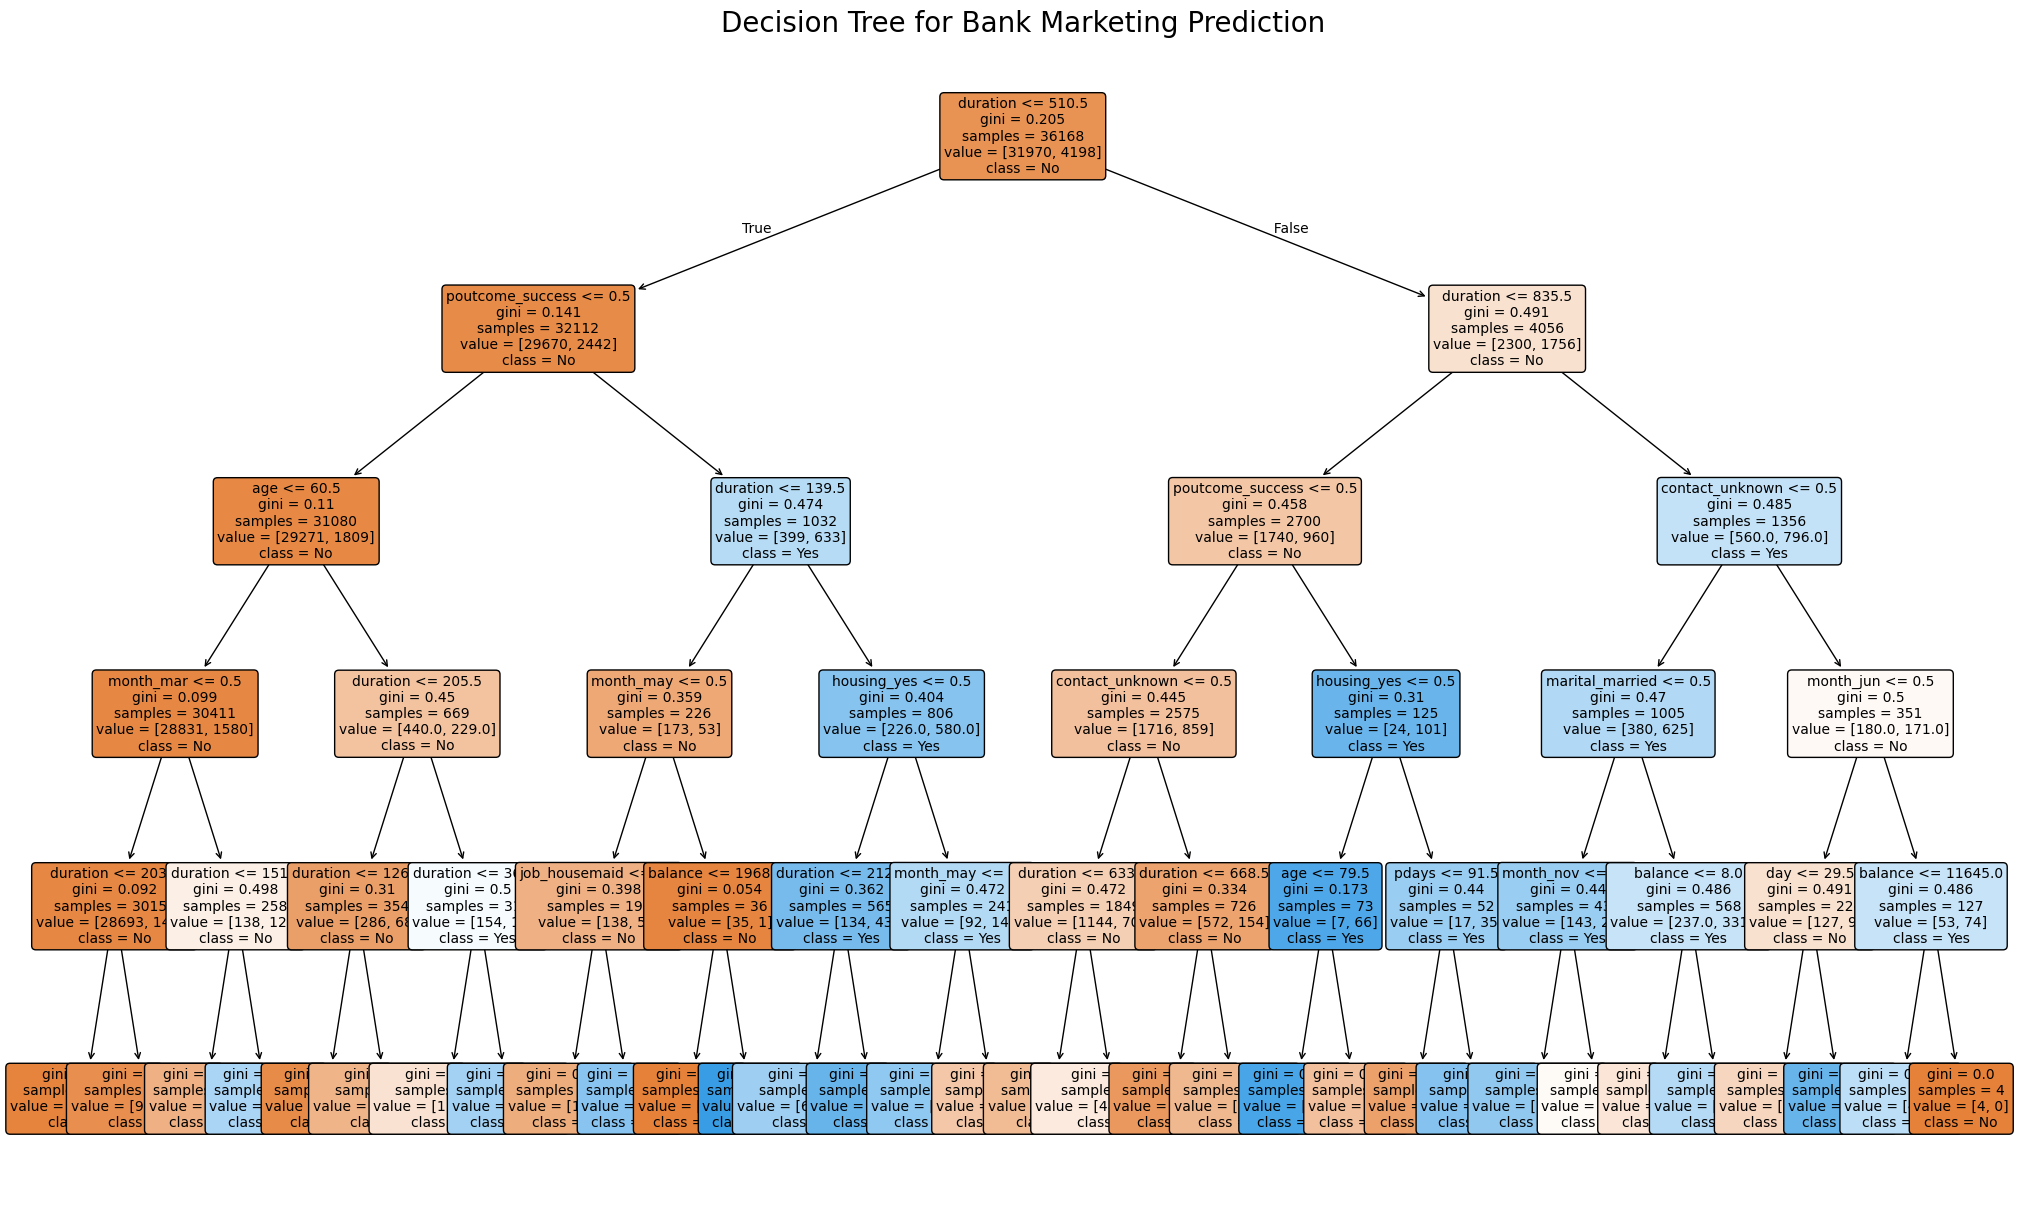


Decision tree visualization saved as 'decision_tree.png'


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

print("Model training complete.")

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(25, 15))
tree.plot_tree(classifier,
               feature_names=X_processed.columns,
               class_names=['No', 'Yes'],
               filled=True,
               rounded=True,
               fontsize=10)

plt.title("Decision Tree for Bank Marketing Prediction", fontsize=20)
plt.savefig('decision_tree.png')
plt.show()

print("\nDecision tree visualization saved as 'decision_tree.png'")